In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("crime_dataset_india.csv")
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [37]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [38]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce', format='%d-%m-%Y %H:%M')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce', format='%d-%m-%Y %H:%M')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce', format='%d-%m-%Y %H:%M')

In [39]:
df['Date Case Closed'] = df['Date Case Closed'].fillna('Not Closed').astype('object')
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')

In [40]:
df.isnull().sum()


Report Number             0
Date Reported             0
Date of Occurrence    24320
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed          0
dtype: int64

In [41]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce', format='%d-%m-%Y')

df['Date Reported'] = df['Date Reported'].combine_first(pd.to_datetime(df['Date Reported'], errors='coerce', format='%m-%d-%Y'))


In [42]:
# Extracting Date and time values

df['Reported Time'] = df['Date Reported'].dt.time
df['Date Reported'] = df['Date Reported'].dt.date





df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time
0,1,2020-01-02,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Closed,00:00:00
1,2,2020-01-01,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Closed,19:00:00
2,3,2020-01-02,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Closed,05:00:00
3,4,2020-01-01,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,05:00:00
4,5,2020-01-01,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,21:00:00


In [43]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

df['Date of Occurrence'] = df['Date of Occurrence'].dt.date
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time
0,1,2020-01-02,2020-01-01,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Closed,00:00:00
1,2,2020-01-01,2020-01-01,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Closed,19:00:00
2,3,2020-01-02,2020-01-01,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Closed,05:00:00
3,4,2020-01-01,2020-01-01,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,05:00:00
4,5,2020-01-01,2020-01-01,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,21:00:00


In [44]:
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce')

df['Time of Occurrence'] = df['Time of Occurrence'].dt.time
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time
0,1,2020-01-02,2020-01-01,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Closed,00:00:00
1,2,2020-01-01,2020-01-01,06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Closed,19:00:00
2,3,2020-01-02,2020-01-01,14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Closed,05:00:00
3,4,2020-01-01,2020-01-01,14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,05:00:00
4,5,2020-01-01,2020-01-01,16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,21:00:00


In [45]:
df.isna().sum()

Report Number             0
Date Reported             0
Date of Occurrence    24320
Time of Occurrence    24332
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed          0
Reported Time             0
dtype: int64

In [46]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Output the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Report Number', 'Crime Code', 'Victim Age', 'Police Deployed']
Categorical Columns: ['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed', 'Date Case Closed', 'Reported Time']


In [47]:
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time
0,1,2020-01-02,2020-01-01,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Closed,00:00:00
1,2,2020-01-01,2020-01-01,06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Closed,19:00:00
2,3,2020-01-02,2020-01-01,14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Closed,05:00:00
3,4,2020-01-01,2020-01-01,14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,05:00:00
4,5,2020-01-01,2020-01-01,16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01,NaT,NaT,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,Not Closed,16:00:00
40156,40157,2024-07-31,NaT,NaT,Mumbai,300,ILLEGAL POSSESSION,75,F,Unknown,Other Crime,2,Yes,2024-09-29 14:00:00,14:00:00
40157,40158,2024-08-02,NaT,NaT,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,Not Closed,03:00:00
40158,40159,2024-08-01,NaT,NaT,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,Not Closed,19:00:00


In [48]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence    24320
Time of Occurrence    24332
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed          0
Reported Time             0
dtype: int64

In [49]:
df.shape

(40160, 15)

In [50]:

df.sample(10)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time
9125,9126,2021-01-17,NaT,NaT,Nagpur,207,HOMICIDE,59,F,Unknown,Other Crime,11,Yes,2022-04-28 17:00:00,17:00:00
37916,37917,2024-04-30,NaT,NaT,Kolkata,178,HOMICIDE,60,F,Knife,Other Crime,15,Yes,2026-04-23 15:00:00,15:00:00
38127,38128,2024-05-10,2024-07-05,08:04:00,Delhi,130,VANDALISM,35,M,Blunt Object,Other Crime,5,Yes,2024-07-25 09:00:00,09:00:00
9552,9553,2021-02-03,2021-02-02,17:56:00,Indore,185,DOMESTIC VIOLENCE,50,F,Blunt Object,Violent Crime,9,Yes,2021-03-09 01:00:00,01:00:00
23962,23963,2022-09-27,NaT,NaT,Chennai,577,SHOPLIFTING,79,X,Blunt Object,Other Crime,11,Yes,2022-11-23 22:00:00,22:00:00
2178,2179,2020-04-01,NaT,NaT,Delhi,470,ASSAULT,40,F,Knife,Violent Crime,18,No,Not Closed,04:00:00
12581,12582,2021-06-10,2021-08-06,20:54:00,Hyderabad,144,IDENTITY THEFT,37,F,Other,Violent Crime,7,No,Not Closed,00:00:00
14419,14420,2021-08-26,NaT,NaT,Kolkata,264,IDENTITY THEFT,65,M,Knife,Violent Crime,9,No,Not Closed,03:00:00
24456,24457,2022-10-18,NaT,NaT,Hyderabad,293,SEXUAL ASSAULT,62,X,Firearm,Violent Crime,17,Yes,2023-12-16 10:00:00,10:00:00
21758,21759,2022-06-26,NaT,NaT,Bangalore,480,ASSAULT,54,X,Unknown,Violent Crime,18,No,Not Closed,16:00:00


In [51]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence    24320
Time of Occurrence    24332
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed          0
Reported Time             0
dtype: int64

In [52]:
df['Date of Occurrence'].fillna(df['Date Reported'], inplace=True)  # Assuming the occurrence date is the same as the reported date
df['Time of Occurrence'].fillna(df['Time of Occurrence'].mode()[0], inplace=True)  # Fill with mode time

In [53]:
df.isna().sum()

Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
Reported Time         0
dtype: int64

In [67]:
df['Month'] = df['Date of Occurrence'].dt.month
df['Year'] = df['Date of Occurrence'].dt.year

In [55]:
df.isna().sum()

Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
Reported Time         0
dtype: int64

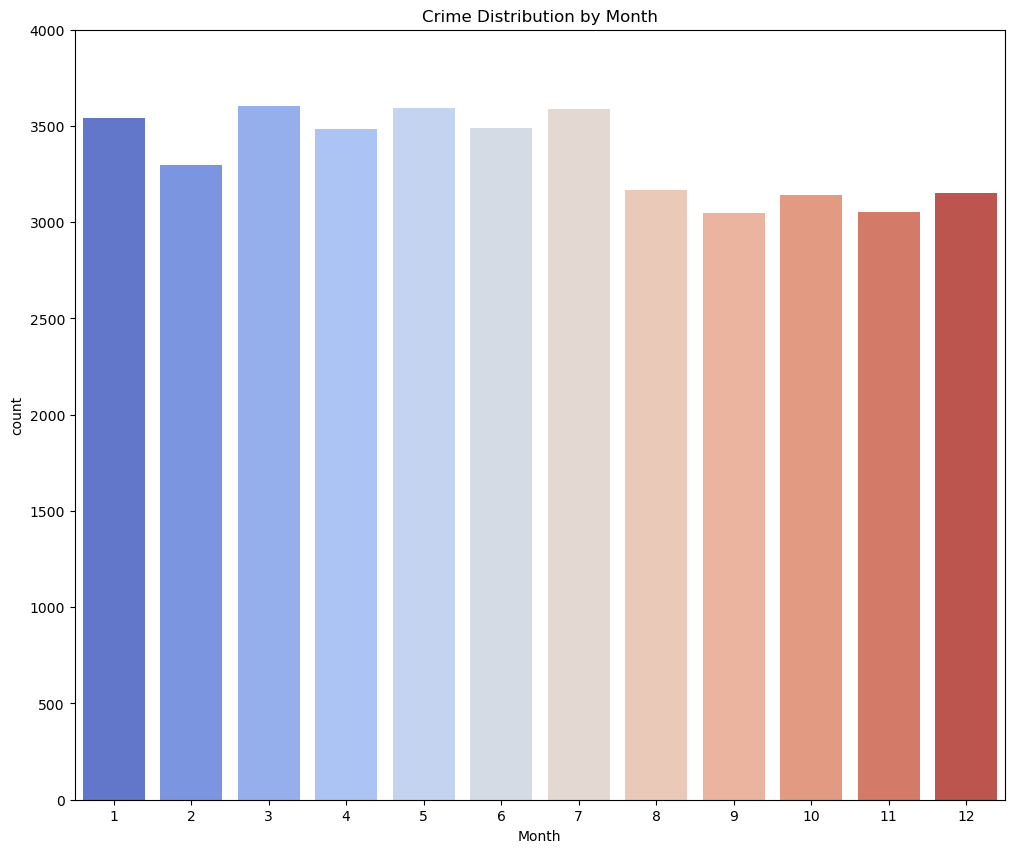

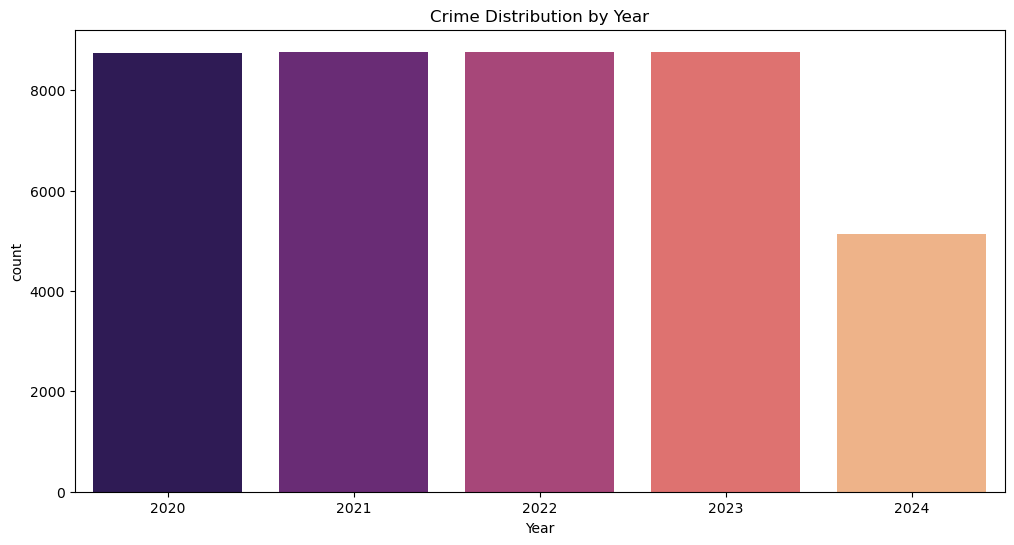

In [57]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df['Month'] = df['Date of Occurrence'].dt.month
df['Year'] = df['Date of Occurrence'].dt.year


plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Month', palette='coolwarm')
plt.ylim(0, 4000) 
plt.title('Crime Distribution by Month')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', palette='magma')
plt.title('Crime Distribution by Year')
plt.show()

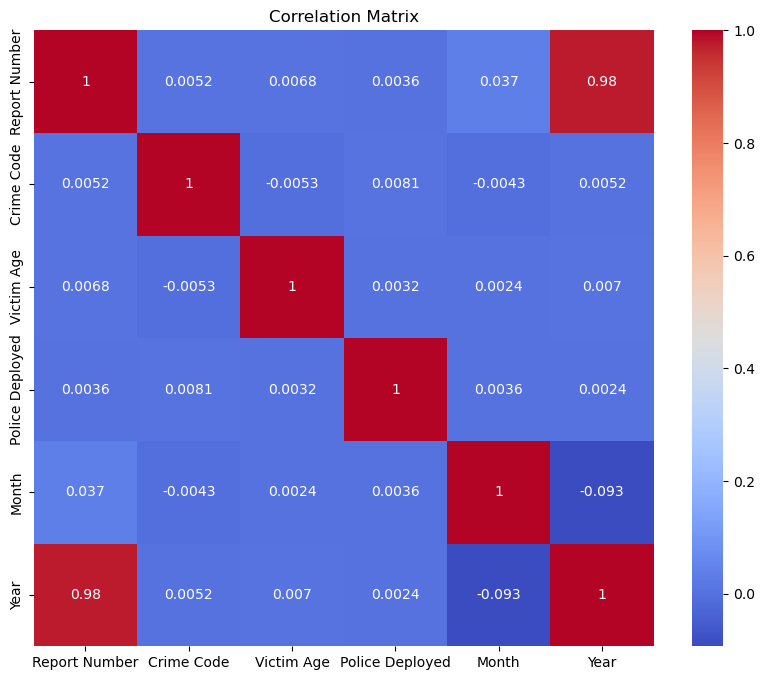

In [59]:
# Convert 'Date of Occurrence' to datetime object if it's not already
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'])

# Extract numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

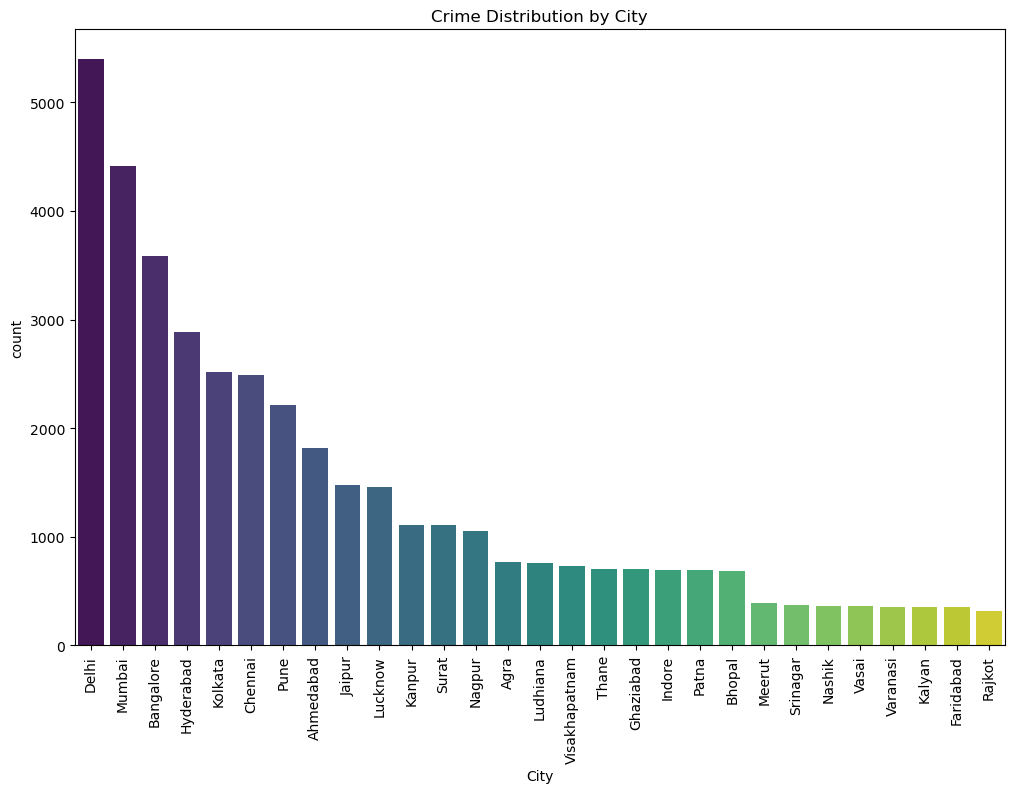

In [61]:
# Geographic Analysis
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index, palette = 'viridis')
plt.xticks(rotation=90)
plt.title('Crime Distribution by City')
plt.show()

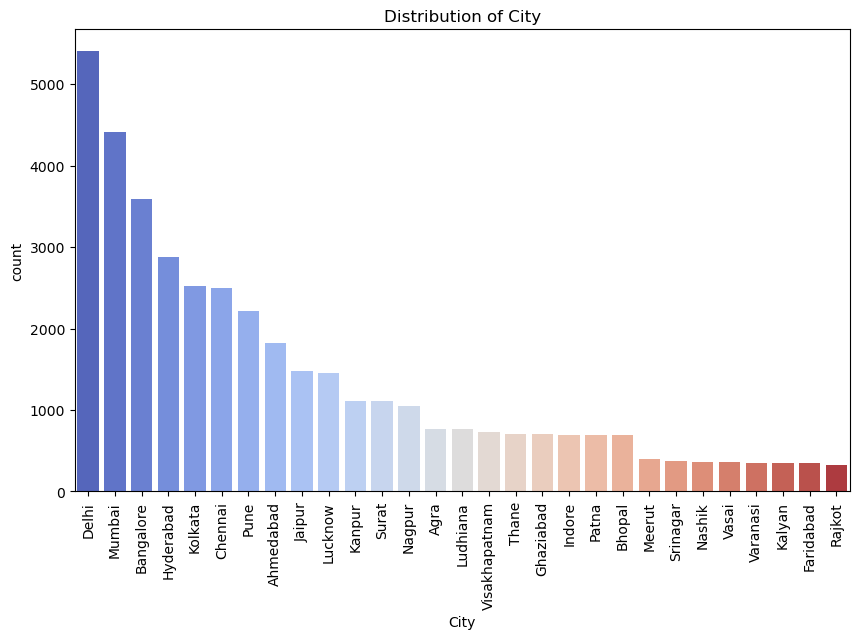

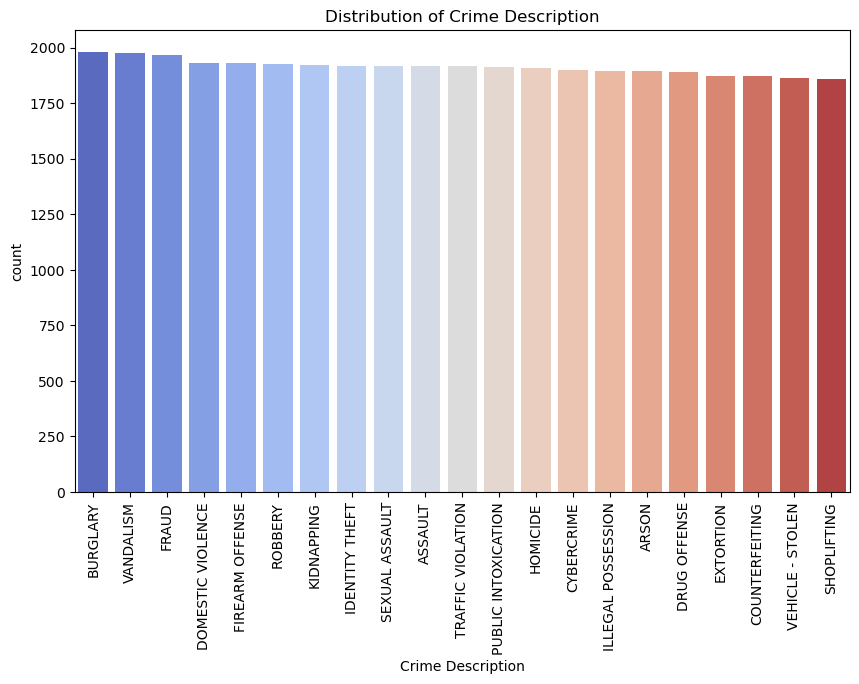

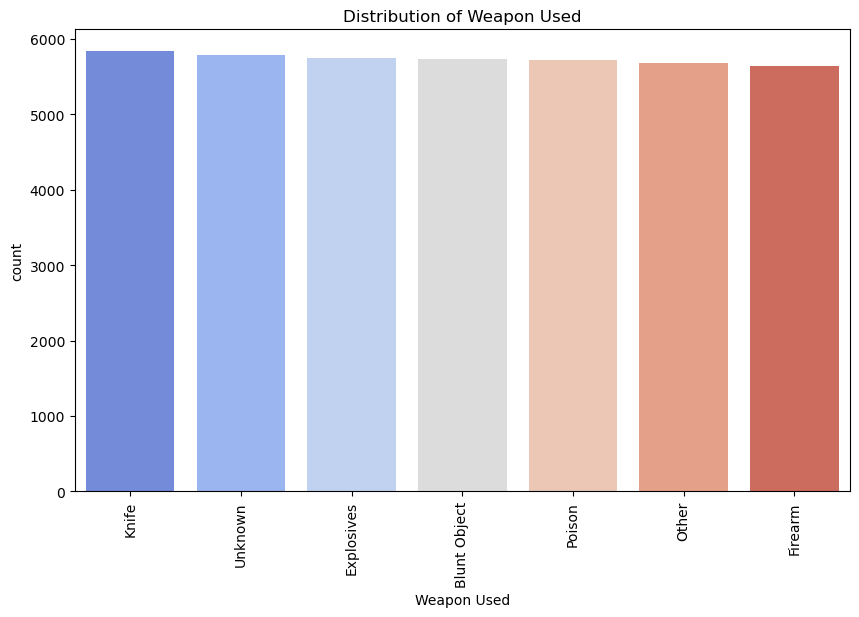

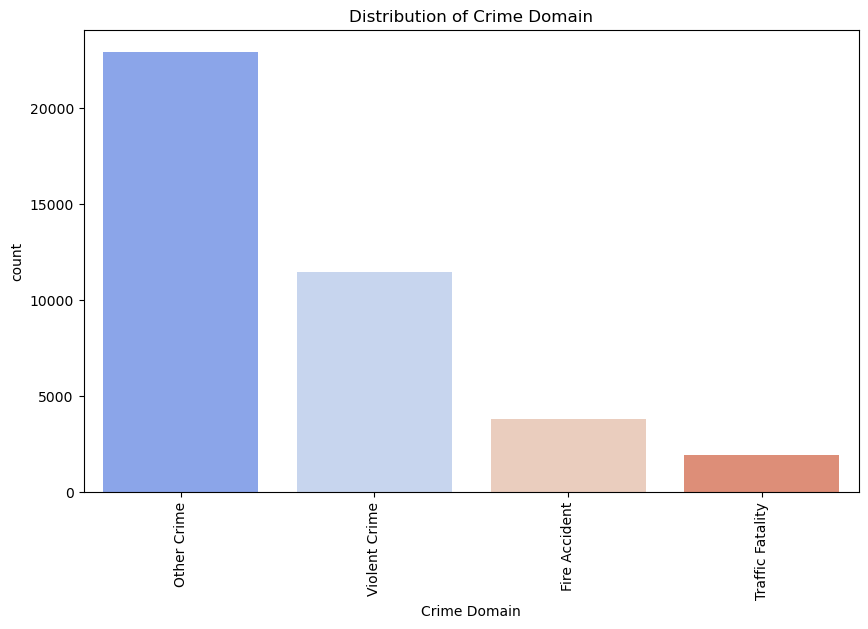

In [63]:
categorical_features = ['City', 'Crime Description', 'Weapon Used', 'Crime Domain']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette = 'coolwarm')
    
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [69]:
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reported Time,Month,Year
0,1,2020-01-02,2020-01-01,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Closed,00:00:00,1,2020
1,2,2020-01-01,2020-01-01,06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Closed,19:00:00,1,2020
2,3,2020-01-02,2020-01-01,14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Closed,05:00:00,1,2020
3,4,2020-01-01,2020-01-01,14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,05:00:00,1,2020
4,5,2020-01-01,2020-01-01,16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,21:00:00,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01,2024-08-01,13:54:00,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,Not Closed,16:00:00,8,2024
40156,40157,2024-07-31,2024-07-31,13:54:00,Mumbai,300,ILLEGAL POSSESSION,75,F,Unknown,Other Crime,2,Yes,2024-09-29 14:00:00,14:00:00,7,2024
40157,40158,2024-08-02,2024-08-02,13:54:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,Not Closed,03:00:00,8,2024
40158,40159,2024-08-01,2024-08-01,13:54:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,Not Closed,19:00:00,8,2024
